# Introduction to seaborn

Seaborn is a plotting package that builds on matplotlib. Reviewing, and understanding the matplotlib section in the Project Pythia Foundations is key for understanding seaborn! While seaborn has a lot of nice api/tooling changes to matplotlib, I still use matplotlib in day to day work. One is not better than the other, they work together well.

Documentation for seaborn: https://seaborn.pydata.org/

### Prerequisites

Working through the matplotlib library is key. Knowing your way around a pandas dataframe is also helpful.

The seaborn example gallery is a great place for ideas: http://seaborn.pydata.org/examples/index.html

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
%load_ext watermark
%watermark --iversions

pandas    : 1.4.3
sys       : 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:01:00) 
[Clang 13.0.1 ]
matplotlib: 3.5.2
seaborn   : 0.12.0
numpy     : 1.21.5



# Loading in data

We will use some of the datasets in scikit learn datasets

In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris() #loading in the data
print('data type:', type(iris)) # not a standard 

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.head(3)

data type: <class 'sklearn.utils._bunch.Bunch'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


Just to get a handle of what our data looks like:

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

# Plot Examples

The plot examples are in no particular order. They all use the same dataset, or a subset of it. Highly reccomend looking through the documentation and examples on what is possible!

# Scatter Plot

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

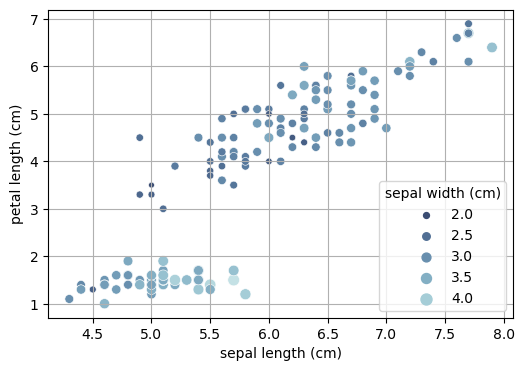

In [7]:
f = plt.figure(figsize=(6,4)) # Setting the figure size in inches

plt.grid() # turning the grid on, there are a few different ways to do this! Notice that this is standard matplotlib 

sns.scatterplot(data=df, # Setting dataframe to use
                x='sepal length (cm)', y='petal length (cm)', # X and Y variables
                hue='sepal width (cm)',  #Setting color based on variable
                size= 'sepal width (cm)', # Setting size based on the same variable 
                palette="ch:r=-.2,d=.3_r" #colors used
                )

# CDF Plot

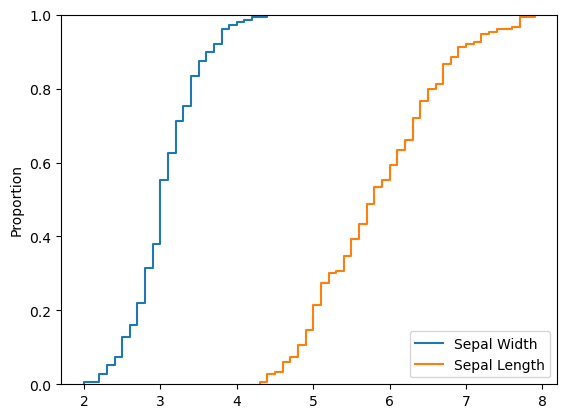

In [8]:
sns.ecdfplot(data=df['sepal width (cm)'].values, label='Sepal Width')
sns.ecdfplot(data=df['sepal length (cm)'].values, label='Sepal Length') # used .values to remove x label

plt.legend()

If you prefer a smooth line, you can get a similar plot using a cumlative KDE. We will cover KDE's more in depth later.

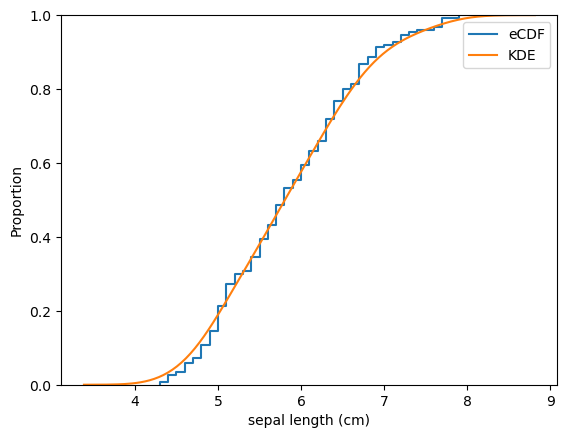

In [9]:
sns.ecdfplot(data=df['sepal length (cm)'], label= 'eCDF' ) # used .values to remove x label
sns.kdeplot(data=df['sepal length (cm)'], cumulative=True, label='KDE')

plt.legend()

# Heatmap

In [10]:
df_var = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
df_corr = df_var.corr() # Creating a correlation matrix -> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
df_corr # made a correlation dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Quick 1 liner:

<AxesSubplot:>

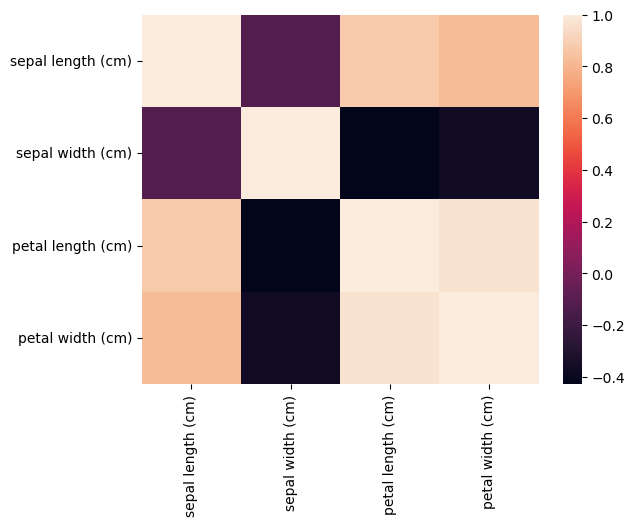

In [11]:
sns.heatmap(df_corr)

Let's change some details to the plot. I generally like putting the numbers (annot=True) on most heatmaps. 

<AxesSubplot:>

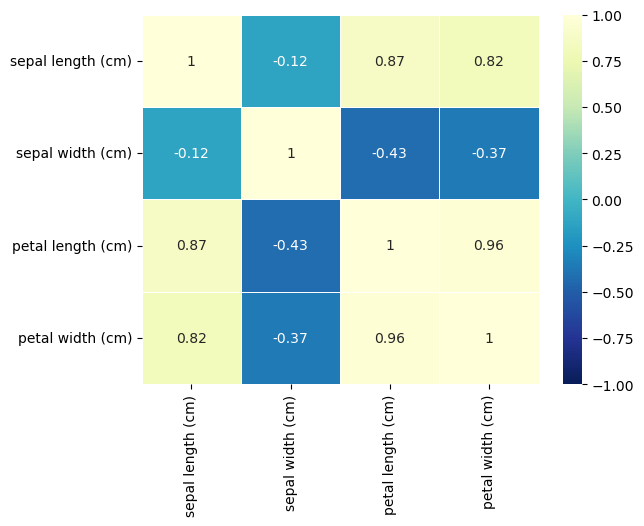

In [12]:
sns.heatmap(df_corr, # Using the entire dataframe we created above  
        vmin=-1, # Min of colorbar
        vmax=1, #max of colorbar
        annot=True, # putting numbers on the plot
        linewidths=.5, # lines inbetween the squares. 
        cmap="YlGnBu_r", # colormap used
        cbar=True # Adding a colorbar
        )

### If we only want to plot one side:

In [13]:
# Getting the Upper Triangle of the co-relation matrix, and using that as a mask
matrix = np.triu(df_corr)

<AxesSubplot:>

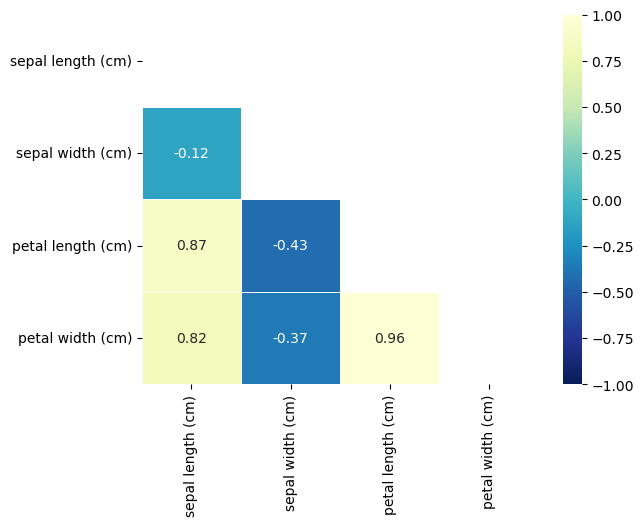

In [14]:
sns.heatmap(df_corr, # Using the entire  
        vmin=-1, 
        vmax=1, 
        annot=True, # putting numbers on the plot
        linewidths=.5,
        cmap="YlGnBu_r",
        cbar=True,
        mask=matrix) #Masking code here

# Box plots

https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:>

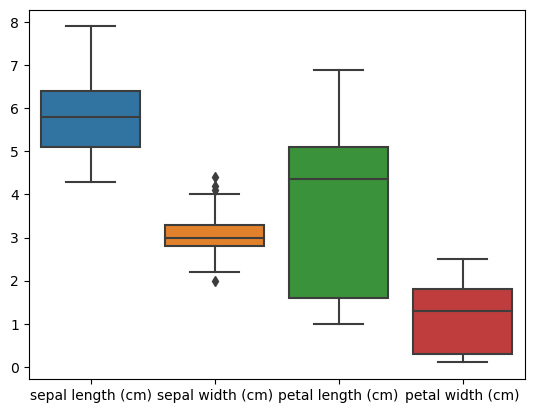

In [15]:
sns.boxplot(data=df_var) # 1 liner!!

Let's add some details:

(array([0, 1, 2, 3]),
 [Text(0, 0, 'sepal length (cm)'),
  Text(1, 0, 'sepal width (cm)'),
  Text(2, 0, 'petal length (cm)'),
  Text(3, 0, 'petal width (cm)')])

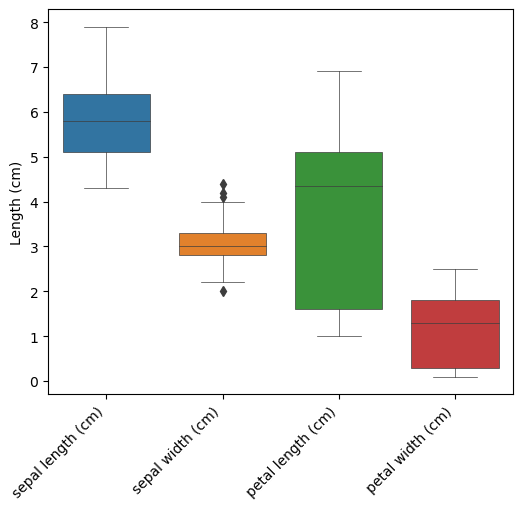

In [16]:
plt.figure(figsize=(6,5))
plt.ylabel('Length (cm)')

sns.boxplot(data=df_var,
            linewidth=0.5,
            width=.75) # 1 liner!!

plt.xticks(rotation=45, ha='right') # setting rotation angle measurement, and horizonal alignment

### Related to the box plot, a violin plot is a slightly different way to visualize the data

https://seaborn.pydata.org/generated/seaborn.violinplot.html

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'sepal length (cm)'),
  Text(1, 0, 'sepal width (cm)'),
  Text(2, 0, 'petal length (cm)'),
  Text(3, 0, 'petal width (cm)'),
  Text(4, 0, 'target')])

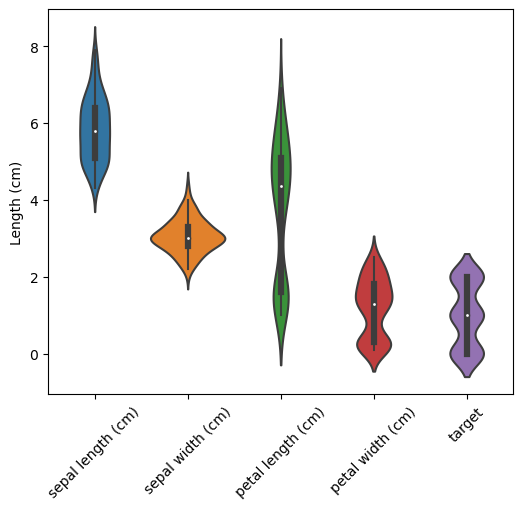

In [17]:
plt.figure(figsize=(6,5))
plt.ylabel('Length (cm)')

sns.violinplot(data=df)

plt.xticks(rotation=45, ha='center')

# Pair Plot

Pair plots are one of my favorite data viz tools

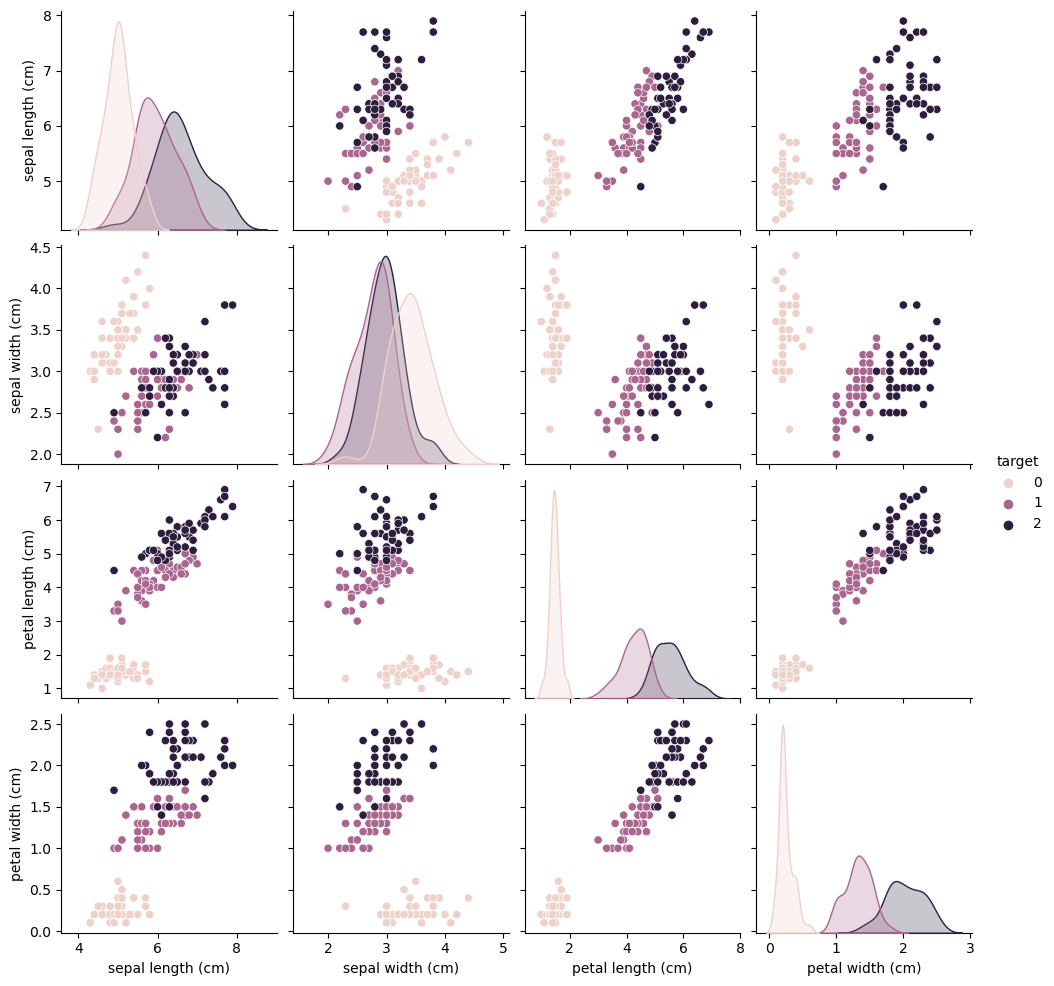

In [18]:
sns.pairplot(df, hue="target") #color the plots 

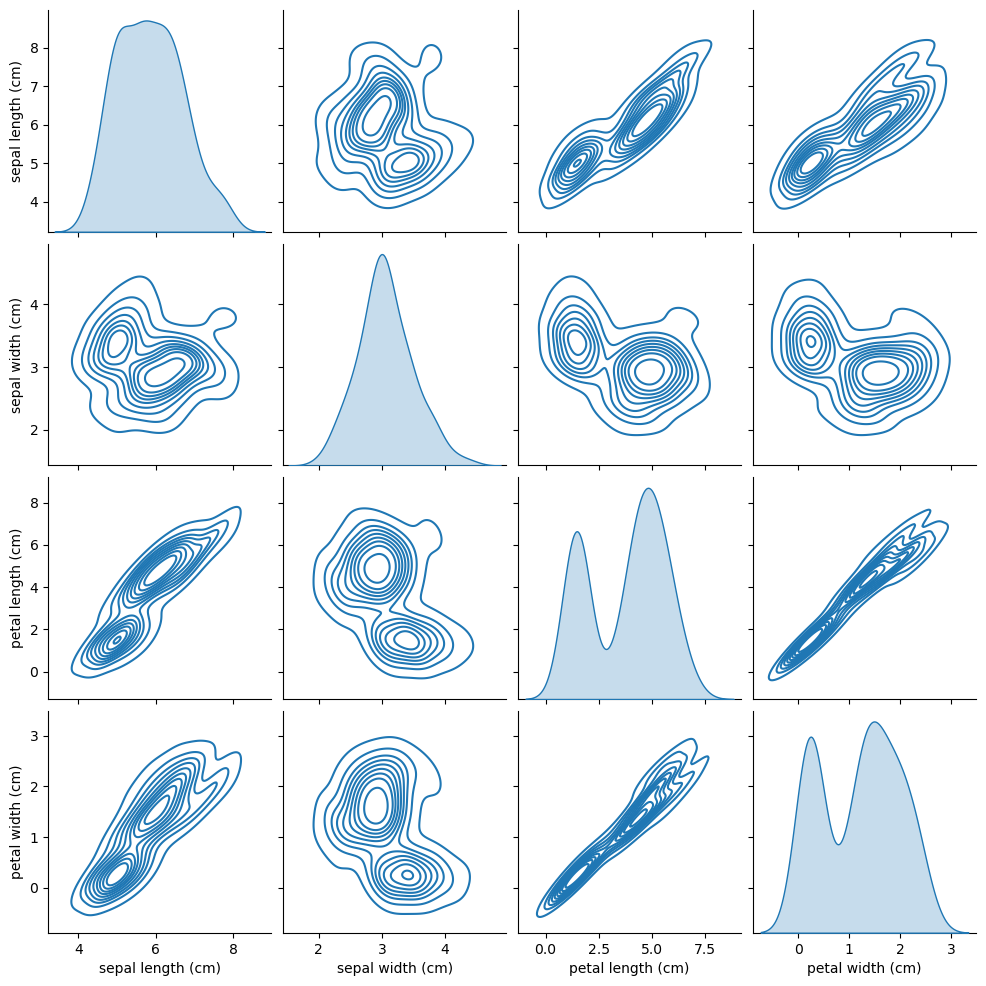

In [19]:
sns.pairplot(df_var, kind='kde') 

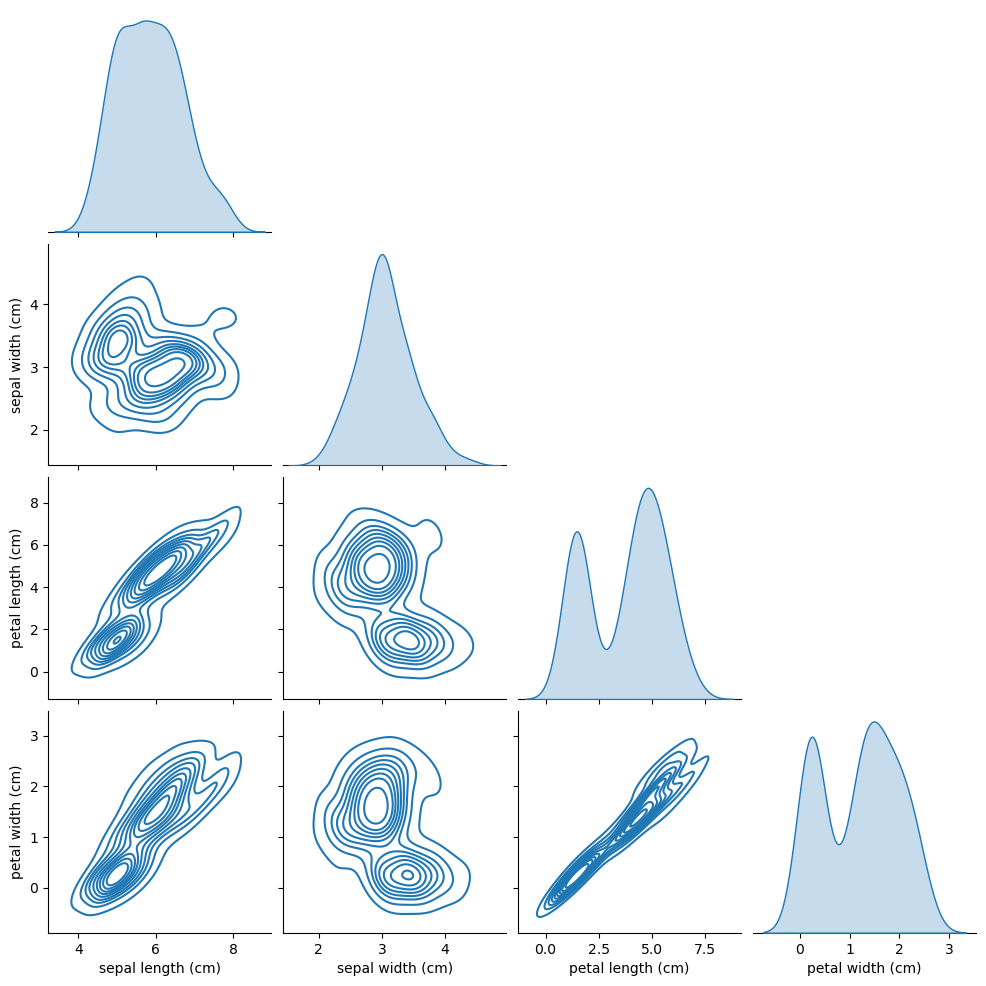

In [20]:

sns.pairplot(df_var, kind='kde', corner=True) 

# Kde Plot

If we want a plot of just one of the relationships from above, you can use the kdeplot function.

In [21]:
sns.kdeplot(df['sepal width (cm)'], df['petal length (cm)'],
                shade=True,
                cbar=True)

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

# Joint Plot with Linear Regression

From this example: http://seaborn.pydata.org/examples/regression_marginals.html

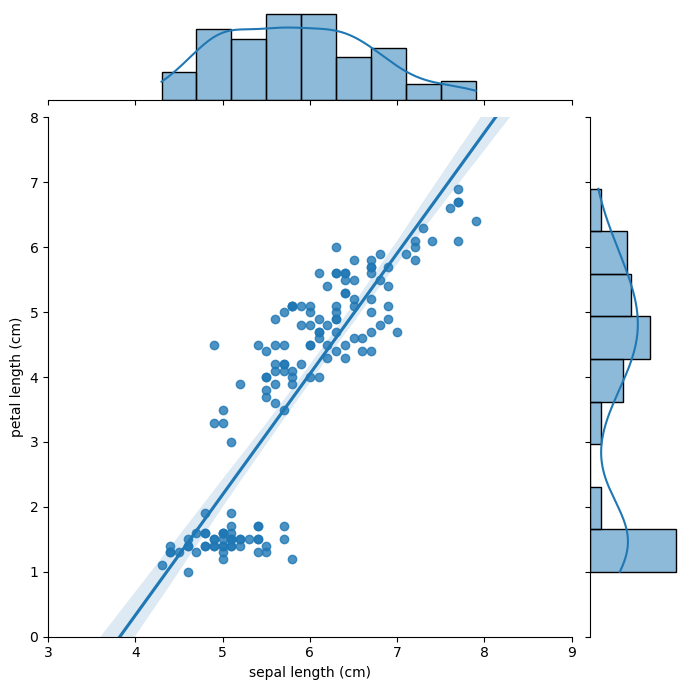

In [ ]:
sns.jointplot(x="sepal length (cm)", 
            y="petal length (cm)", 
            data=df,
            kind="reg", truncate=False,
            xlim=(3, 9), ylim=(0, 8),
            height=7)

# Swarm Plot

Documentation for swarm plot: https://seaborn.pydata.org/generated/seaborn.swarmplot.html

/Users/tmartin/opt/anaconda3/envs/ml_scratch/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  
/Users/tmartin/opt/anaconda3/envs/ml_scratch/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  
/Users/tmartin/opt/anaconda3/envs/ml_scratch/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  


(array([0, 1, 2, 3]),
 [Text(0, 0, 'sepal length (cm)'),
  Text(1, 0, 'sepal width (cm)'),
  Text(2, 0, 'petal length (cm)'),
  Text(3, 0, 'petal width (cm)')])

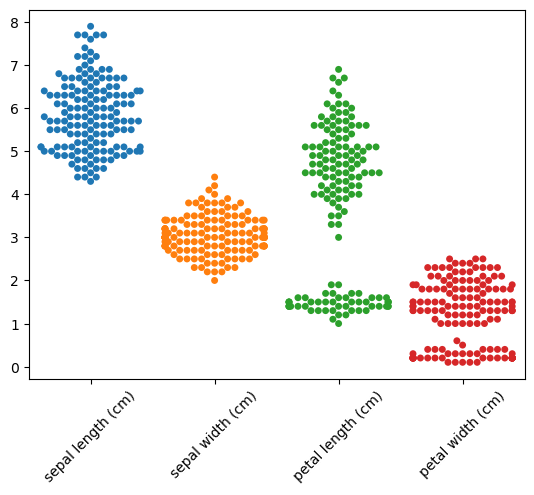

In [ ]:
sns.swarmplot(data=df_var)

plt.xticks(rotation=45, ha='center')

### Summary

This is a short notebook that covers some additional data viz with Seaborn. This is not a replacement for matplotlib!